In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping
from ml_logic.preprocessor import data_balancing, create_model, load_and_preprocess_image, image_augmentation


In [63]:
# Loading Datasets

train = pd.read_csv('../data/RFMiD_Training_Labels.csv').set_index('ID')
test = pd.read_csv('../data/RFMiD_Testing_Labels.csv').set_index('ID')
eval = pd.read_csv('../data/RFMiD_Validation_Labels.csv').set_index('ID')


In [64]:
# Splitting Data

# X_train = train.drop(columns='Disease_Risk')
X_train = data_balancing(table_link='../data/')
# y_train = train['Disease_Risk']
y_train = X_train
X_eval  = eval.drop(columns='Disease_Risk')
y_eval = eval['Disease_Risk']


In [65]:
print(X_train.sample(5))
print(X_train.shape)
print(y_train.sample(5))
print(y_train.shape)


      Disease_Risk
ID                
1317             1
1061             1
1682             1
1786             0
380              1
(802, 1)
      Disease_Risk
ID                
85               1
680              0
82               1
1894             0
1673             1
(802, 1)


In [66]:
# Loading Images

image_folder = '../data/training_images'
eval_image_folder = '../data/eval_images'
images = np.array([load_and_preprocess_image(row_id, image_folder) for row_id in X_train.index])
eval_images = np.array([load_and_preprocess_image(row_id, eval_image_folder) for row_id in X_eval.index])


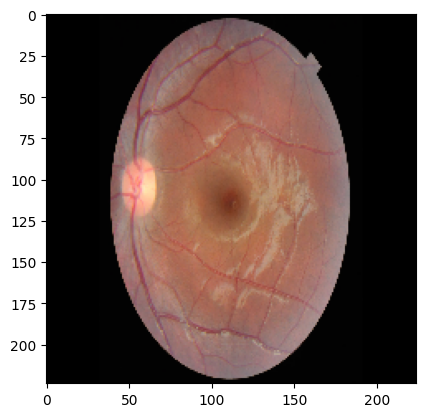

In [67]:
plt.imshow(images[0])


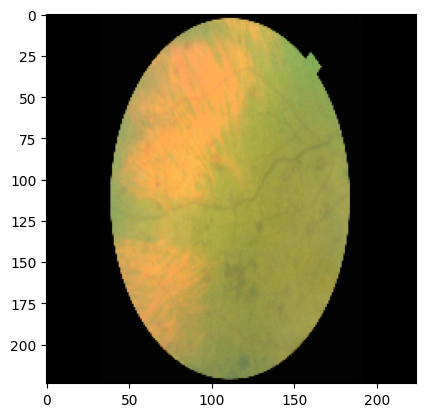

In [68]:
plt.imshow(eval_images[0])


In [69]:
# Augment Images

augmented_images = image_augmentation(images)
augmented_eval_images = image_augmentation(eval_images)


In [70]:
print(augmented_images.shape)
print(augmented_eval_images.shape)


(802, 224, 224, 3)
(640, 224, 224, 3)


In [87]:
model = create_model((224,224,3))


In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [89]:
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 394272)            0         
                                                                 
 dense_12 (Dense)            (None, 12)                4731276   
                                                                 
 dense_13 (Dense)            (None, 64)                832       
                                                           

In [90]:
early_stopper = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.05,
    patience=10,
)


In [91]:
model.fit(
    augmented_images, y_train,
    validation_data=(augmented_eval_images, y_eval),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopper]
)


Epoch 1/20
13/13 [==============================] - 8s 544ms/step - loss: 0.6943 - accuracy: 0.4963 - val_loss: 0.6856 - val_accuracy: 0.7906
Epoch 2/20
13/13 [==============================] - 7s 540ms/step - loss: 0.6934 - accuracy: 0.4938 - val_loss: 0.6953 - val_accuracy: 0.2094
Epoch 3/20
13/13 [==============================] - 7s 562ms/step - loss: 0.6937 - accuracy: 0.4975 - val_loss: 0.6900 - val_accuracy: 0.7875
Epoch 4/20
13/13 [==============================] - 7s 540ms/step - loss: 0.6924 - accuracy: 0.5399 - val_loss: 0.6975 - val_accuracy: 0.2406
Epoch 5/20
13/13 [==============================] - 7s 531ms/step - loss: 0.6936 - accuracy: 0.5075 - val_loss: 0.6920 - val_accuracy: 0.6219
Epoch 6/20
13/13 [==============================] - 7s 521ms/step - loss: 0.6925 - accuracy: 0.5424 - val_loss: 0.7015 - val_accuracy: 0.2203
Epoch 7/20
13/13 [==============================] - 7s 548ms/step - loss: 0.6906 - accuracy: 0.5436 - val_loss: 0.7137 - val_accuracy: 0.2141
Epoch 

In [92]:
model.evaluate(eval_images, y_eval)


20/20 [==============================] - 1s 55ms/step - loss: 10.5801 - accuracy: 0.7906


[10.58005142211914, 0.7906249761581421]